In [1]:
%matplotlib widget

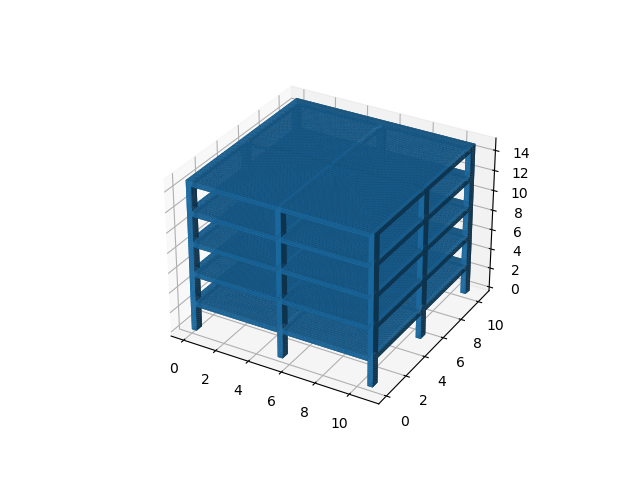

In [2]:
#  geometría
from fenics import *
mesh = Mesh("portico_5pisos.xml")
plot(mesh)

In [3]:
deltat = 0.1 
total_time = 60.0
k = 3.74

In [5]:
# leer las caras
caras = MeshFunction('size_t', mesh, "portico_5pisos_facet_region.xml")

In [6]:
#  espacio funcional
V = FunctionSpace(mesh, "P", 1)

In [7]:
# condiciones de borde
ub = 360
bc = DirichletBC(V, Constant(ub), caras, 1715)

In [8]:
#  formulación variacional
u = TrialFunction(V)
v = TestFunction(V)
un = Function(V)

Edificio = u*v*dx +  deltat * k * dot(  grad(u), grad(v) )*dx  - un * v * dx

a = lhs(Edificio)
l = rhs(Edificio)

In [9]:
# Ploteo de la solución

vtkfile = File("solucion_fenics/edificio.pvd")

u = Function(V)
t = 0

num_iter = int(total_time/deltat)
for n in range(num_iter):
    t += deltat
    solve(a == l, u, bc)
    un.assign(u)
    if (n%5 ==0):
        print(n)
        vtkfile << (u, t)

Solving linear variational problem.
0
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
5
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
10
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
15
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
20
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
25
Solving linear variational problem.
Solving line